#### In this Notebook I explore the application of neural networks on natural language processing to categorize news articles. Below is a dataframe with some examples of the categories and news article headlines. The dataframe includes 2,225 articles.

In [1]:
#Reading in dataframe
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv")
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [2]:
#Example of article
df.iloc[0]['text']

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

#### Below are the value counts for each category. Sports have the most articles and entertainment the least. Balncing the data may be necessary, but this is unlikely because there are more than 2. 

In [3]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

Text(0, 0.5, 'Category Count')

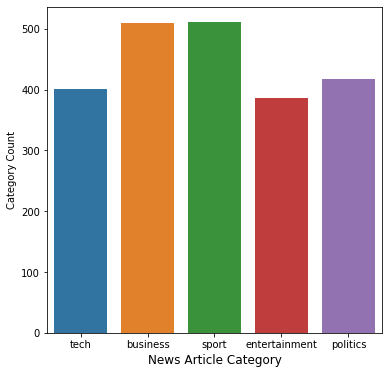

In [4]:
#visualization of the categories
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.countplot(x='category', data=df)
plt.xlabel("News Article Category", fontsize=12)
plt.ylabel("Category Count")

#### The neural networks will look at the emedding of the words in the sentence to extract meaning and then place the articiles into one of the fouur categories

In [5]:
#assigning columns
texts = df.text.values.astype('U')
labels = df.category

### 2) Preprocess your data such that each document in the data is represented as a sequence of equal length.

In [6]:
#Preprcoessing the articile text into tokenzied data marix
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 500
training_samples = 1670
validation_samples = 555
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

Using TensorFlow backend.


In [7]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 29726 unique tokens.


In [8]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (2225, 500)
Shape of label tensor: (2225,)


In [9]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


x_train = data[:training_samples] #200 words
y_train = labels[:training_samples]
x_test = data[:validation_samples]
y_test = labels[:validation_samples]

#### A model with an embedding layer and dense layers (but w/ no layers meant for sequential data)

In [25]:
from keras.layers import Dense, Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(x_train, pd.get_dummies(y_train),
                    epochs=10,
                    batch_size=32,
                   validation_data=(x_test, pd.get_dummies(y_test)))

C:\Users\zacha\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1670 samples, validate on 555 samples
Epoch 1/10
1670/1670 [==============================] - 0s 261us/step - loss: 1.5160 - acc: 0.3162 - val_loss: 1.3725 - val_acc: 0.4865
Epoch 2/10
1670/1670 [==============================] - 0s 287us/step - loss: 1.2761 - acc: 0.5401 - val_loss: 1.0929 - val_acc: 0.6937
Epoch 3/10
1670/1670 [==============================] - 0s 113us/step - loss: 0.9483 - acc: 0.7557 - val_loss: 0.7383 - val_acc: 0.8270
Epoch 4/10
1670/1670 [==============================] - 0s 196us/step - loss: 0.6111 - acc: 0.8946 - val_loss: 0.4366 - val_acc: 0.9423
Epoch 5/10
1670/1670 [==============================] - 0s 278us/step - loss: 0.3462 - acc: 0.9617 - val_loss: 0.2328 - val_acc: 0.9784
Epoch 6/10
1670/1670 [==============================] - 0s 159us/step - loss: 0.1787 - acc: 0.9892 - val_loss: 0.1189 - val_acc: 0.9928
Epoch 7/10
1670/1670 [==============================] - 0s 147us/step - loss: 0.0921 - acc: 0.9952 - val_loss: 0.0548 - val_acc: 1.0000
E

#### A model using an Embedding layer with Conv1d Layers

In [8]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Dense, Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense



model = Sequential()
model.add(layers.Embedding(10000,128, input_length=maxlen))
model.add(layers.Conv1D(64, 8, activation='relu')) 
model.add(layers.MaxPooling1D()) #
model.add(layers.Conv1D(64, 8, activation='relu'))
model.add(layers.MaxPooling1D()) #
model.add(layers.Conv1D(64, 8, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(Dense(5, activation='softmax'))


model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.fit(x_train, pd.get_dummies(y_train),
                    epochs=20,
                    batch_size=20,
                   validation_data=(x_test, pd.get_dummies(y_test)))

C:\Users\zacha\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1670 samples, validate on 555 samples
Epoch 1/20
1670/1670 [==============================] - 10s 6ms/step - loss: 1.5942 - acc: 0.2299 - val_loss: 1.5737 - val_acc: 0.3802
Epoch 2/20
1670/1670 [==============================] - 9s 6ms/step - loss: 1.5651 - acc: 0.3138 - val_loss: 1.5536 - val_acc: 0.4703
Epoch 3/20
1670/1670 [==============================] - 9s 5ms/step - loss: 1.5450 - acc: 0.3940 - val_loss: 1.5335 - val_acc: 0.5279
Epoch 4/20
1670/1670 [==============================] - 11s 6ms/step - loss: 1.5248 - acc: 0.4407 - val_loss: 1.5150 - val_acc: 0.4973
Epoch 5/20
1670/1670 [==============================] - 11s 7ms/step - loss: 1.5012 - acc: 0.4629 - val_loss: 1.4930 - val_acc: 0.4234
Epoch 6/20
1670/1670 [==============================] - 11s 7ms/step - loss: 1.4738 - acc: 0.4802 - val_loss: 1.4585 - val_acc: 0.5351
Epoch 7/20
1670/1670 [==============================] - 11s 7ms/step - loss: 1.4312 - acc: 0.5365 - val_loss: 1.3932 - val_acc: 0.5387
Epoch 8/20

#### A model using an Embedding layer with one sequential layer

In [12]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Dense, Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import SimpleRNN, LSTM
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN


model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(x_train, pd.get_dummies(y_train),
                    epochs=5,
                    batch_size=32,
                   validation_data=(x_test, pd.get_dummies(y_test)))


C:\Users\zacha\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1670 samples, validate on 555 samples
Epoch 1/5
1670/1670 [==============================] - 30s 18ms/step - loss: 1.6038 - acc: 0.2377 - val_loss: 1.5907 - val_acc: 0.3928
Epoch 2/5
1670/1670 [==============================] - 21s 13ms/step - loss: 1.5596 - acc: 0.3162 - val_loss: 1.5271 - val_acc: 0.2721
Epoch 3/5
1670/1670 [==============================] - 26s 15ms/step - loss: 1.3143 - acc: 0.4210 - val_loss: 1.2223 - val_acc: 0.4324
Epoch 4/5
1670/1670 [==============================] - 20s 12ms/step - loss: 1.1195 - acc: 0.4874 - val_loss: 1.1072 - val_acc: 0.5784
Epoch 5/5
1670/1670 [==============================] - 26s 16ms/step - loss: 0.9815 - acc: 0.6671 - val_loss: 1.2343 - val_acc: 0.6342


####  A model using an Embedding layer with stacked sequential layers

In [16]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Dense, Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import SimpleRNN, LSTM
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN


model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(x_train, pd.get_dummies(y_train),
                    epochs=10,
                    batch_size=32,
                   validation_data=(x_test, pd.get_dummies(y_test)))


C:\Users\zacha\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1670 samples, validate on 555 samples
Epoch 1/10
1670/1670 [==============================] - 124s 74ms/step - loss: 1.6027 - acc: 0.2539 - val_loss: 1.6474 - val_acc: 0.2847
Epoch 2/10
1670/1670 [==============================] - 112s 67ms/step - loss: 1.5778 - acc: 0.2551 - val_loss: 1.6208 - val_acc: 0.2198
Epoch 3/10
1670/1670 [==============================] - 111s 66ms/step - loss: 1.6082 - acc: 0.2335 - val_loss: 1.6039 - val_acc: 0.2486
Epoch 4/10
1670/1670 [==============================] - 92s 55ms/step - loss: 1.6007 - acc: 0.2251 - val_loss: 1.5821 - val_acc: 0.2342
Epoch 5/10
1670/1670 [==============================] - 93s 56ms/step - loss: 1.5744 - acc: 0.2503 - val_loss: 1.5428 - val_acc: 0.2721
Epoch 6/10
1670/1670 [==============================] - 93s 56ms/step - loss: 1.5542 - acc: 0.2970 - val_loss: 1.5189 - val_acc: 0.3027
Epoch 7/10
1670/1670 [==============================] - 91s 54ms/step - loss: 1.3850 - acc: 0.3868 - val_loss: 1.1751 - val_acc: 0.468

#### A model using an Embedding layer with bidirectional sequential layers

In [17]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Dense, Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import SimpleRNN, LSTM
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN



model = Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(x_train, pd.get_dummies(y_train),
                    epochs=10,
                    batch_size=32,
                   validation_data=(x_test, pd.get_dummies(y_test)))

C:\Users\zacha\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1670 samples, validate on 555 samples
Epoch 1/10
1670/1670 [==============================] - 32s 19ms/step - loss: 1.5775 - acc: 0.2713 - val_loss: 1.3935 - val_acc: 0.4829
Epoch 2/10
1670/1670 [==============================] - 29s 18ms/step - loss: 1.3655 - acc: 0.4503 - val_loss: 1.3788 - val_acc: 0.3946
Epoch 3/10
1670/1670 [==============================] - 32s 19ms/step - loss: 1.3386 - acc: 0.4437 - val_loss: 1.2566 - val_acc: 0.5640
Epoch 4/10
1670/1670 [==============================] - 31s 19ms/step - loss: 1.0963 - acc: 0.5503 - val_loss: 0.9898 - val_acc: 0.5820
Epoch 5/10
1670/1670 [==============================] - 25s 15ms/step - loss: 0.9824 - acc: 0.5778 - val_loss: 0.8876 - val_acc: 0.5946
Epoch 6/10
1670/1670 [==============================] - 4983s 3s/step - loss: 0.8521 - acc: 0.6437 - val_loss: 0.7001 - val_acc: 0.8000
Epoch 7/10
1670/1670 [==============================] - 15s 9ms/step - loss: 0.7103 - acc: 0.7749 - val_loss: 0.5915 - val_acc: 0.7622
Ep

#### A model using an Embedding layer with bidirectional sequential layers and drop out

In [13]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Dense, Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import SimpleRNN, LSTM
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN



model = Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.Bidirectional(layers.LSTM(32,dropout=0.2, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(32,dropout=0.2, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(32,dropout=0.2)))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(x_train, pd.get_dummies(y_train),
                    epochs=10,
                    batch_size=32,
                   validation_data=(x_test, pd.get_dummies(y_test)))

C:\Users\zacha\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1670 samples, validate on 555 samples
Epoch 1/10
1670/1670 [==============================] - 84s 50ms/step - loss: 1.4485 - acc: 0.3701 - val_loss: 1.1385 - val_acc: 0.5351
Epoch 2/10
1670/1670 [==============================] - 74s 44ms/step - loss: 1.0389 - acc: 0.5952 - val_loss: 0.7832 - val_acc: 0.6973
Epoch 3/10
1670/1670 [==============================] - 83s 50ms/step - loss: 0.7623 - acc: 0.6934 - val_loss: 0.7520 - val_acc: 0.6739
Epoch 4/10
1670/1670 [==============================] - 76s 46ms/step - loss: 0.6236 - acc: 0.7647 - val_loss: 0.4244 - val_acc: 0.8144
Epoch 5/10
1670/1670 [==============================] - 82s 49ms/step - loss: 0.3972 - acc: 0.8707 - val_loss: 0.5897 - val_acc: 0.7784
Epoch 6/10
1670/1670 [==============================] - 79s 47ms/step - loss: 0.4573 - acc: 0.8240 - val_loss: 0.2530 - val_acc: 0.9351
Epoch 7/10
1670/1670 [==============================] - 77s 46ms/step - loss: 0.2835 - acc: 0.9108 - val_loss: 0.0977 - val_acc: 0.9874
E

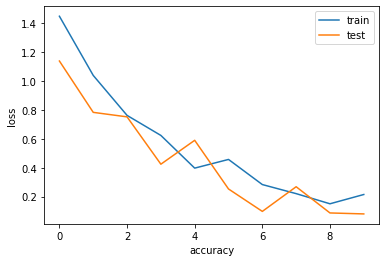

In [15]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.xlabel("accuracy")
plt.ylabel("loss")
plt.legend()
plt.show()